In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as k
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
data.dropna(inplace=True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [14]:
data.drop_duplicates(inplace=True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

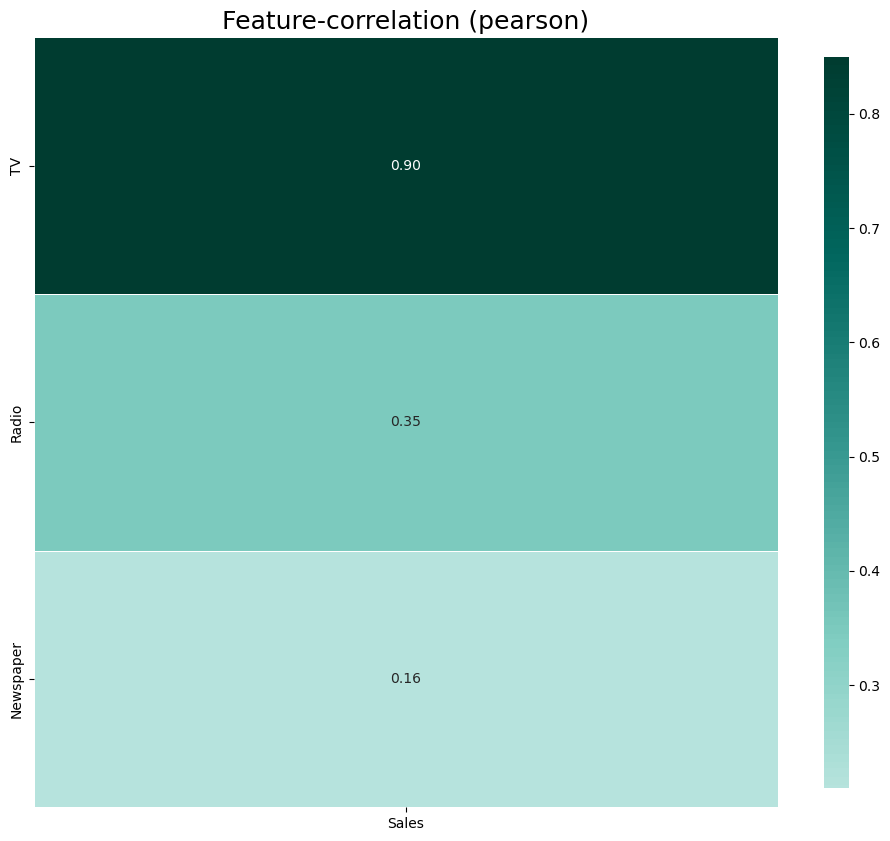

In [16]:
k.corr_plot(data=data, target='Sales')

In [18]:
x = data[['TV','Radio']].values
x

array([[230.1,  37.8],
       [ 44.5,  39.3],
       [ 17.2,  45.9],
       [151.5,  41.3],
       [180.8,  10.8],
       [  8.7,  48.9],
       [ 57.5,  32.8],
       [120.2,  19.6],
       [  8.6,   2.1],
       [199.8,   2.6],
       [ 66.1,   5.8],
       [214.7,  24. ],
       [ 23.8,  35.1],
       [ 97.5,   7.6],
       [204.1,  32.9],
       [195.4,  47.7],
       [ 67.8,  36.6],
       [281.4,  39.6],
       [ 69.2,  20.5],
       [147.3,  23.9],
       [218.4,  27.7],
       [237.4,   5.1],
       [ 13.2,  15.9],
       [228.3,  16.9],
       [ 62.3,  12.6],
       [262.9,   3.5],
       [142.9,  29.3],
       [240.1,  16.7],
       [248.8,  27.1],
       [ 70.6,  16. ],
       [292.9,  28.3],
       [112.9,  17.4],
       [ 97.2,   1.5],
       [265.6,  20. ],
       [ 95.7,   1.4],
       [290.7,   4.1],
       [266.9,  43.8],
       [ 74.7,  49.4],
       [ 43.1,  26.7],
       [228. ,  37.7],
       [202.5,  22.3],
       [177. ,  33.4],
       [293.6,  27.7],
       [206

In [20]:
y = data[['Sales']].values
y

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11

In [22]:
sc = StandardScaler()

In [24]:
x = sc.fit_transform(x)
x

array([[ 0.96985227,  0.98152247],
       [-1.19737623,  1.08280781],
       [-1.51615499,  1.52846331],
       [ 0.05204968,  1.21785493],
       [ 0.3941822 , -0.84161366],
       [-1.61540845,  1.73103399],
       [-1.04557682,  0.64390467],
       [-0.31343659, -0.24740632],
       [-1.61657614, -1.42906863],
       [ 0.61604287, -1.39530685],
       [-0.94515567, -1.17923146],
       [ 0.79002835,  0.04969734],
       [-1.4390876 ,  0.79920886],
       [-0.57850171, -1.05768905],
       [ 0.66625345,  0.65065703],
       [ 0.56466461,  1.65000572],
       [-0.92530498,  0.9004942 ],
       [ 1.56887609,  1.10306488],
       [-0.90895735, -0.18663512],
       [ 0.0030068 ,  0.04294498],
       [ 0.8332328 ,  0.29953451],
       [ 1.05509347, -1.22649795],
       [-1.5628625 , -0.4972435 ],
       [ 0.94883389, -0.42971994],
       [-0.98952781, -0.72007125],
       [ 1.35285385, -1.33453565],
       [-0.04837147,  0.40757221],
       [ 1.08662104, -0.44322465],
       [ 1.18820988,

In [25]:
y

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [29]:
model = LinearRegression()

In [30]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
model.coef_

array([[4.59940898, 1.65159085]])

In [32]:
model.intercept_

array([15.19359925])

In [33]:
testing_score = model.score(x_test,y_test)*100
testing_score

86.95929214202678

In [34]:
training_score = model.score(x_train,y_train)*100
training_score

91.59322824278064

In [35]:
R2_score =r2_score(y_test,model.predict(x_test))
R2_score

0.8695929214202679

In [36]:
mean = mean_absolute_error(y_test,model.predict(x_test))
mean

1.3624601670963168

In [37]:
mse = mean_squared_error(y_test,model.predict(x_test))
mse

3.926343775565502

In [39]:
y_predict = model.predict(x)
y_predict

array([[21.27542001],
       [11.47473176],
       [10.74457841],
       [17.44439509],
       [15.61660298],
       [10.62263504],
       [11.44803091],
       [13.34336217],
       [ 5.39806778],
       [15.72255634],
       [ 8.89883389],
       [18.90934241],
       [ 9.89461289],
       [10.78596373],
       [19.33259053],
       [20.51585709],
       [12.42499121],
       [24.23131389],
       [10.7046878 ],
       [15.27835628],
       [19.52068612],
       [18.02073285],
       [ 7.18411263],
       [18.84795283],
       [ 9.4530931 ],
       [19.21182055],
       [15.64426163],
       [19.45938805],
       [21.08645812],
       [10.2780314 ],
       [23.58875073],
       [12.70595615],
       [10.08957181],
       [21.19693009],
       [ 9.99785958],
       [20.77178058],
       [23.92095566],
       [14.22304026],
       [ 9.99437402],
       [21.15148373],
       [18.06453403],
       [17.93289863],
       [23.55943267],
       [16.75069768],
       [ 8.91613148],
       [16